In [4]:
import yfinance as yf
import talib
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize, basinhopping
from sklearn.decomposition import PCA

In [7]:
stonks = 'MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM'#,ALK,ALB,ARE,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS'#,ANTM,AON,AOS,APA,AAPL,AMAT,APTV,ADM,ANET,AJG,AIZ,T,ATO,ADSK,ADP,AZO,AVB,AVY,BKR,BLL,BAC,BBWI,BAX,BDX,BBY,BIO,TECH,BIIB,BLK,BK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BRO,CHRW,CDNS,CZR,CPB,COF,CAH,KMX,CCL,CARR,CTLT,CAT,CBOE,CBRE,CDW,CE,CNC,CNP,CDAY,CERN,CF,CRL,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CTXS,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,ED,STZ,COO,CPRT,GLW,CTVA,COST,CTRA,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,DXCM,FANG,DLR,DFS,DISCA,DISCK,DISH,DG,DLTR,D,DPZ,DOV,DOW,DTE,DUK,DRE,DD,DXC,EMN,ETN,EBAY,ECL,EIX,EW,EA,EMR,ENPH,ETR,EOG,EFX,EQIX,EQR,ESS,EL,ETSY,EVRG,ES,RE,EXC,EXPE,EXPD,EXR,XOM,FFIV,FAST,FRT,FDX,FIS,FITB,FE,FRC,FISV,FLT,FMC,F,FTNT,FTV,FBHS,FOXA,FOX,BEN,FCX,GPS,GRMN,IT,GNRC,GD,GE,GIS,GM,GPC,GILD,GL,GPN,GS,GWW,HAL,HBI,HIG,HAS,HCA,PEAK,HSIC,HSY,HES,HPE,HLT,HOLX,HD,HON,HRL,HST,HWM,HPQ,HUM,HBAN,HII,IEX,IDXX,INFO,ITW,ILMN,INCY,IR,INTC,ICE,IBM,IP,IPG,IFF,INTU,ISRG,IVZ,IPGP,IQV,IRM,JKHY,J,JBHT,SJM,JNJ,JCI,JPM,JNPR,KSU,K,KEY,KEYS,KMB,KIM,KMI,KLAC,KHC,KR,LHX,LH,LRCX,LW,LVS,LEG,LDOS,LEN,LLY,LNC,LIN,LYV,LKQ,LMT,L,LOW,LUMN,LYB,MTB,MRO,MPC,MKTX,MAR,MMC,MLM,MAS,MA,MTCH,MKC,MCD,MCK,MDT,MRK,FB,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MRNA,MHK,TAP,MDLZ,MPWR,MNST,MCO,MS,MOS,MSI,MSCI,NDAQ,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NLSN,NKE,NI,NSC,NTRS,NOC,NLOK,NCLH,NRG,NUE,NVDA,NVR,NXPI,ORLY,OXY,ODFL,OMC,OKE,ORCL,OGN,OTIS,PCAR,PKG,PH,PAYX,PAYC,PYPL,PENN,PNR,PBCT,PEP,PKI,PFE,PM,PSX,PNW,PXD,PNC,POOL,PPG,PPL,PFG,PG,PGR,PLD,PRU,PTC,PEG,PSA,PHM,PVH,QRVO,PWR,QCOM,DGX,RL,RJF,RTX,O,REG,REGN,RF,RSG,RMD,RHI,ROK,ROL,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,NOW,SHW,SPG,SWKS,SNA,SO,LUV,SWK,SBUX,STT,STE,SYK,SIVB,SYF,SNPS,SYY,TMUS,TROW,TTWO,TPR,TGT,TEL,TDY,TFX,TER,TSLA,TXN,TXT,TMO,TJX,TSCO,TT,TDG,TRV,TRMB,TFC,TWTR,TYL,TSN,UDR,ULTA,USB,UAA,UA,UNP,UAL,UNH,UPS,URI,UHS,VLO,VTR,VRSN,VRSK,VZ,VRTX,VFC,VIAC,VTRS,V,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WST,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS'
syms = stonks.split(',')
df = yf.download(stonks, start='2005-1-1')
df.head()

[*********************100%***********************]  14 of 14 completed


Adj Close                                    \
                                   A        AAP ABBV   ABMD        ABT   
Date                                                                     
2005-01-03 00:00:00-05:00  14.593754  26.046278  NaN  15.01  14.587080   
2005-01-04 00:00:00-05:00  14.208741  25.872828  NaN  14.98  14.440171   
2005-01-05 00:00:00-05:00  14.202630  25.920675  NaN  14.69  14.274515   
2005-01-06 00:00:00-05:00  13.890954  25.896749  NaN  14.52  14.596457   
2005-01-07 00:00:00-05:00  13.878733  25.747234  NaN  14.29  14.846500   

                                                                             \
                                 ACN       ADBE       AES        AFL   AKAM   
Date                                                                          
2005-01-03 00:00:00-05:00  19.218695  30.838949  9.923674  13.082966  12.82   
2005-01-04 00:00:00-05:00  18.766834  30.024111  9.557489  13.069787  12.20   
2005-01-05 00:00:00-05:00  18.693953  29.859142  9.535514  12.974243  12.00   
2005-01-06 00:00:00-05:00  18.526329  29.364239  9.542842  13.175215  11.94   
2005-01-07 00:00:00-05:00  19.393610  29.384233  9.403691  13.076375  12.15   

                           ...    Volume                                       \
                           ...       ABT       ACN     ADBE      AES      AFL   
Date                       ...                                                  
2005-01-03 00:00:00-05:00  ...   7165902   2425500  5508800  2011200  2342200   
2005-01-04 00:00:00-05:00  ...   7886828   4101800  7515400  2242500  3044800   
2005-01-05 00:00:00-05:00  ...   6601292   3302600  3566600  2073800  2519600   
2005-01-06 00:00:00-05:00  ...  11950188   3295400  6159600  1909200  2798600   
2005-01-07 00:00:00-05:00  ...  13965402  10569900  8512400   900600  2342400   

                                                                         
                              AKAM       AMD      APD     ATVI      MMM  
Date                                                                     
2005-01-03 00:00:00-05:00  2508200   9275300   892906  7157689  3192000  
2005-01-04 00:00:00-05:00  2066700  20375800  1456972  7491911  3644600  
2005-01-05 00:00:00-05:00  2209600  19217200  1357628  5523556  2895300  
2005-01-06 00:00:00-05:00  1920000  10759300   787509  5419378  3014500  
2005-01-07 00:00:00-05:00  2061500  16590200  1070082  8944711  3293000  

[5 rows x 84 columns]

In [12]:
adj = df['Adj Close'].ffill()
rets = adj.pct_change().fillna(0)
rets[np.isinf(rets)]=0

In [18]:
roc = adj.transform(lambda x: talib.ROC(x, 10))

In [20]:
roc.corrwith(rets.shift(-1),axis=0).mean()

-0.03472025892618989

In [21]:
roc.corrwith(rets.shift(-1),axis=1).mean() #cross sectional correlation

-0.009457668935367248

In [27]:
aroon = pd.DataFrame({sym: talib.AROONOSC(df.High[sym],df.Low[sym],5) for sym in syms})
cci = pd.DataFrame({sym: talib.CCI(df.High[sym],df.Low[sym],df.Close[sym], 20) for sym in syms})
bop = pd.DataFrame({sym: talib.BOP(df.Open[sym], df.High[sym],df.Low[sym],df.Close[sym]) for sym in syms})


In [30]:
print(aroon.corrwith(rets.shift(-1),axis=0).mean())
print(cci.corrwith(rets.shift(-1), axis=0).mean())
print(bop.corrwith(rets.shift(-1), axis=0).mean())

-0.019591972145790133
-0.01820281776167474
-0.026509365776348517


In [31]:
m = np.zeros((4,4))
for i,a in enumerate([roc,aroon,cci,bop]):
    for j,b in enumerate([roc,aroon,cci,bop]):
        m[i,j] = a.corrwith(b).mean()
m

array([[1.        , 0.52852755, 0.76033541, 0.23162509],
       [0.52852755, 1.        , 0.68089102, 0.1669595 ],
       [0.76033541, 0.68089102, 1.        , 0.25568141],
       [0.23162509, 0.1669595 , 0.25568141, 1.        ]])

In [32]:
np.sum(np.triu(m)-np.identity(4))/6

0.43733666379708286

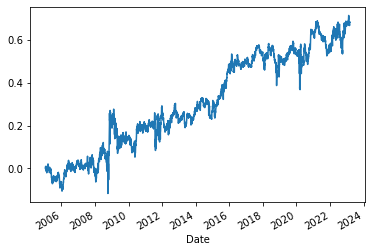

In [37]:
(-rets.shift(-1).fillna(0)*np.sign(roc)).mean(axis=1).cumsum().plot()

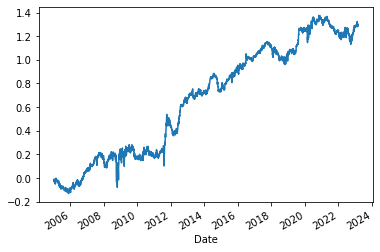

In [38]:
(-rets.shift(-1).fillna(0)*np.sign(aroon)).mean(axis=1).cumsum().plot()

<AxesSubplot:xlabel='Date'>

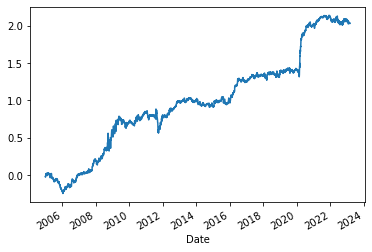

In [35]:
(-rets.shift(-1).fillna(0)*np.sign(bop)).mean(axis=1).cumsum().plot()

<AxesSubplot:xlabel='Date'>

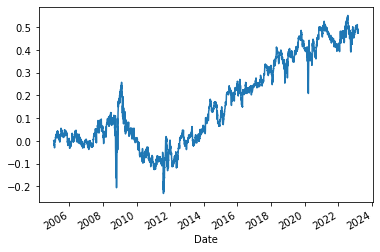

In [36]:
(-rets.shift(-1).fillna(0)*np.sign(cci)).mean(axis=1).cumsum().plot()

<AxesSubplot:xlabel='Date'>

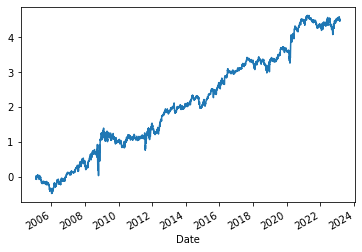

In [39]:
a = (-rets.shift(-1).fillna(0)*np.sign(roc)).mean(axis=1).cumsum()
b = (-rets.shift(-1).fillna(0)*np.sign(aroon)).mean(axis=1).cumsum()
c = (-rets.shift(-1).fillna(0)*np.sign(bop)).mean(axis=1).cumsum()
d = (-rets.shift(-1).fillna(0)*np.sign(cci)).mean(axis=1).cumsum()

(a+b+c+d).plot()

In [43]:
combined = aroon/aroon.std(axis=0) + roc/roc.std(axis=0) + bop/bop .std(axis=0) + cci/cci.std(axis=0)
ranking = np.argsort(combined,axis=1)
ranking #go short lowest ranked, and long highest ranked

,A,AAP,ABBV,ABMD,ABT,ACN,ADBE,AES,AFL,AKAM,AMD,APD,ATVI,MMM
Date,,,,,,,,,,,,,,
2005-01-03 00:00:00-05:00,0,1,2,3,4,5,6,7,8,9,10,11,12,13
2005-01-04 00:00:00-05:00,0,1,2,3,4,5,6,7,8,9,10,11,12,13
2005-01-05 00:00:00-05:00,0,1,2,3,4,5,6,7,8,9,10,11,12,13
2005-01-06 00:00:00-05:00,0,1,2,3,4,5,6,7,8,9,10,11,12,13
2005-01-07 00:00:00-05:00,0,1,2,3,4,5,6,7,8,9,10,11,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 00:00:00-05:00,9,5,13,6,0,7,4,8,12,1,10,11,2,3
2023-03-01 00:00:00-05:00,5,0,6,1,9,7,4,12,10,13,8,11,2,3
2023-03-02 00:00:00-05:00,5,7,8,1,6,9,0,10,4,13,2,12,11,3


In [45]:
N = 4
(np.sign(ranking[ranking<N]+1)*rets.shift(-1)).mean(axis=1).cumsum().plot()

,A,AAP,ABBV,ABMD,ABT,ACN,ADBE,AES,AFL,AKAM,AMD,APD,ATVI,MMM
Date,,,,,,,,,,,,,,
2005-01-03 00:00:00-05:00,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04 00:00:00-05:00,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05 00:00:00-05:00,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-06 00:00:00-05:00,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-07 00:00:00-05:00,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 00:00:00-05:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0
2023-03-01 00:00:00-05:00,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2023-03-02 00:00:00-05:00,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0


<AxesSubplot:xlabel='Date'>

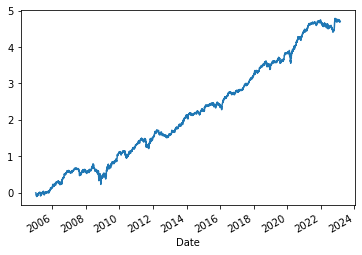

In [46]:
(np.sign(ranking[ranking<N]+1)*rets.shift(-1)).mean(axis=1).cumsum().plot()

<AxesSubplot:xlabel='Date'>

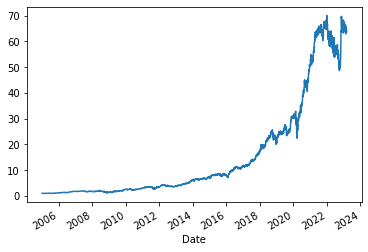

In [47]:
(1+np.sign(ranking[ranking<N]+1)*rets.shift(-1)).mean(axis=1).cumprod().plot() 

<AxesSubplot:xlabel='Date'>

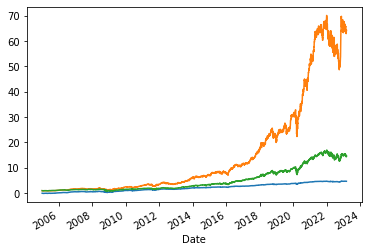

In [49]:
(np.sign(ranking[ranking<N]+1)*rets.shift(-1)).mean(axis=1).cumsum().plot()
(1+np.sign(ranking[ranking<N]+1)*rets.shift(-1)).mean(axis=1).cumprod().plot() 
(1+rets.mean(axis=1)).cumprod().plot()

In [59]:
ret1 = ((np.sign(ranking[ranking<N]+1))*rets.shift(-1)).mean(axis=1)
sharpe = np.mean(ret1 / np.std(ret1))
sharpe*np.sqrt(252)

1.0590740755668606